<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: Abeal Sileshi

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [142]:
#old stalwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant

from scipy.optimize import curve_fit

## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [143]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

The summary is this,                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sat, 24 Apr 2021   Prob (F-statistic):            0.00217
Time:                        16:04:05   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.1

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


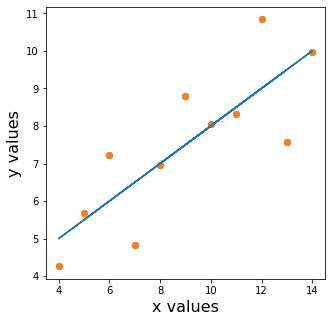

In [144]:
#copying over dataset 1
d1 = df.iloc[:11]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.scatter(d1["x"], d1["y"])
axes.set_xlabel("x values", fontsize=16)
axes.set_ylabel("y values", fontsize=16)

model = sm.OLS(d1["y"], sm.add_constant(d1["x"])).fit()
print("The summary is this, ", model.summary())

#to calculate line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

# solutions
a, b = best_fit(d1["x"], d1["y"])


# plot points and fit line
plt.scatter(d1["x"], d1["y"])
yfit = [a + b * xi for xi in d1["x"]]
plt.plot(d1["x"], yfit)

**The final model is:**
<br>
$y$ = $3.0$ + $0.5x$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

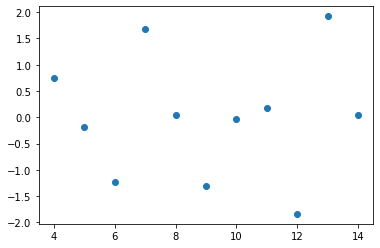

In [145]:
resid = yfit - d1["y"] #residuals are the difference between the line of best fit and y-vals

plt.scatter(d1["x"], resid)

(array([1., 2., 0., 0., 2., 3., 1., 0., 0., 2.]),
 array([-1.83881818, -1.46280909, -1.0868    , -0.71079091, -0.33478182,
         0.04122727,  0.41723636,  0.79324545,  1.16925455,  1.54526364,
         1.92127273]),
 <BarContainer object of 10 artists>)

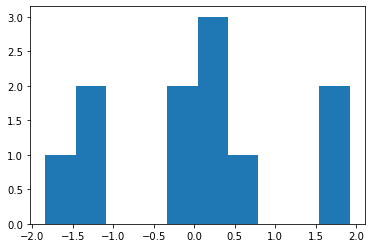

In [146]:
plt.hist(resid)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

- There is a linear relationship in plot A
- There is homoskedasticity of errors, from shape of plot in A
- There is also independence of errors, we can see in the residual plot there isn't any correlation
- The residuals of the model are normally distributed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

n/a


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

We don't adjust the model in the first part because our simple linear regression predicts the data well. The line of best fit is seen to be a reliable predictor. The residuals are evenly spaced apart as well.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

The summary is this,                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sat, 24 Apr 2021   Prob (F-statistic):            0.00218
Time:                        16:04:06   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.1

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


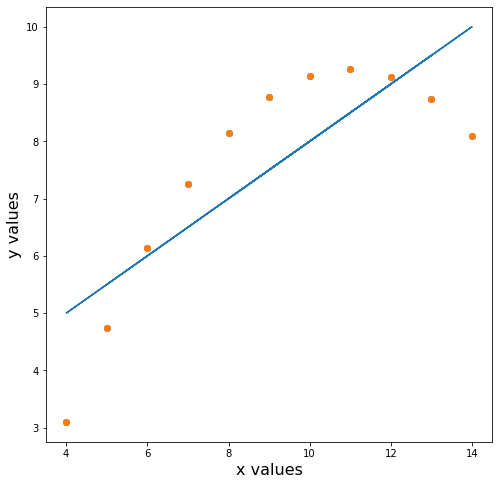

In [147]:
#copying over dataset 2
d2 = df.iloc[11:22]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(d2["x"], d2["y"])
axes.set_xlabel("x values", fontsize=16)
axes.set_ylabel("y values", fontsize=16)

model = sm.OLS(d2["y"], sm.add_constant(d2["x"])).fit()
print("The summary is this, ", model.summary())

c, d = best_fit(d2["x"], d2["y"])

# plot points and fit line
plt.scatter(d2["x"], d2["y"])
yfit1 = [c + d * xi for xi in d2["x"]]
plt.plot(d2["x"], yfit1)

**The final model is:**
<br>
$y$ = $3.0$ + $0.5x$

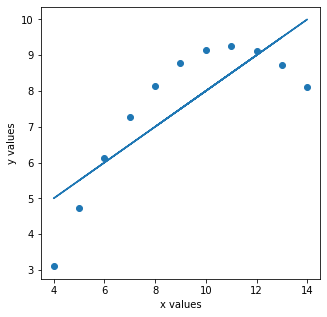

In [148]:
#to check for linearity
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

#plot the data
plt.scatter(d2['x'], d2['y'])
ax.set_xlabel('x values')
ax.set_ylabel('y values')

#plot our fit
plt.plot(d2['x'], model.fittedvalues)
yfit1 = [c + d * xi for xi in d2["x"]]
res = d2["y"] - model.fittedvalues #residuals are the difference between the line of best fit and y-vals

(array([2., 0., 0., 2., 0., 0., 2., 0., 2., 3.]),
 array([-1.90090909e+00, -1.58390909e+00, -1.26690909e+00, -9.49909091e-01,
        -6.32909091e-01, -3.15909091e-01,  1.09090909e-03,  3.18090909e-01,
         6.35090909e-01,  9.52090909e-01,  1.26909091e+00]),
 <BarContainer object of 10 artists>)

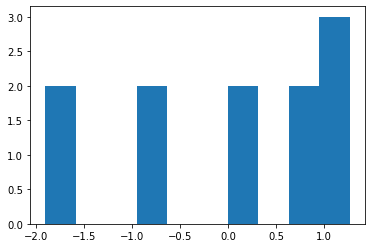

In [149]:
#to check if residuals are normally distributed
#look for outliers at tails (skew) or missing near the middle (kurtosis)
plt.hist(model.resid)

#alternative way to print residuals is below
#plt.hist(res)


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

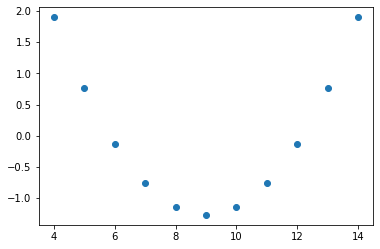

In [150]:
# plt.scatter(d2['y'], model.resid)

#print(yfit)
res = yfit1 - d2["y"] #residuals are the difference between the line of best fit and y-vals
#print(resid)
plt.scatter(d2["x"], res)

# plt.hist(resid)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

- There is not a linear relationship, seen from the scatter plot
- There is not homoskedasticity of errors
- There is also not independence of errors
- The residuals of the model are not normally distributed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           8.64e-26
Time:                        16:04:07   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.0

<ipython-input-151-02a9a8d24bdb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['xsq'] = xsq
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


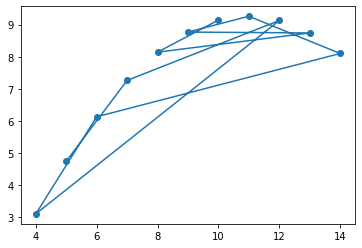

In [151]:
# model = sm.OLS(d2["y"], sm.add_constant(d2["x"])).fit()
#use column_stack to add a column

# for i in range(len(d2)):
#     if i > 0:
        
# print(xsq, d2["x"])
d2new = np.column_stack((d2, xsq))
# print(d2new)
# print(d2new.shape)
# print(d2)

########Newcode################

xsq = d2["x"]**2
d2['xsq'] = xsq

y, X = dmatrices("y ~ x+xsq", data=d2, eval_env=0, return_type='dataframe')


mlrquad=sm.OLS(y, X).fit()
mlrquad.summary()

plt.scatter(d2['x'], d2['y'])
plt.plot(d2['x'], mlrquad.fittedvalues)
# print(d2)

print(mlrquad.summary())


**The final model is:**
<br>
$y$ = $-6.00$ + $2.78x$ $-0.12x^2$


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The model residuals are said to suffer from heteroscedasticity. Also there isn't normality in the residuals nor independence of errors. In order to fix these issues I added a squared term to make the model quadratic. We can see there should be a better fit here (although the graph looks like a bunch of sribbles, I don't know why I copied the code exact from the inclass notebooks).

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

The summary is this,                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sat, 24 Apr 2021   Prob (F-statistic):            0.00218
Time:                        16:04:07   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.1

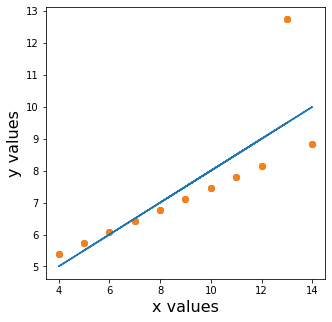

In [152]:
#copying over dataset 3
d3 = df.iloc[22:33]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.scatter(d3["x"], d3["y"])
axes.set_xlabel("x values", fontsize=16)
axes.set_ylabel("y values", fontsize=16)

model = sm.OLS(d3["y"], sm.add_constant(d3["x"])).fit()
print("The summary is this, ", model.summary())

c, d = best_fit(d3["x"], d3["y"])

# plot points and fit line
plt.scatter(d3["x"], d3["y"])
yfit1 = [c + d * xi for xi in d3["x"]]
plt.plot(d3["x"], yfit1)

**The final model is:**
<br>
$y$ = $3.0$ + $0.5x$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

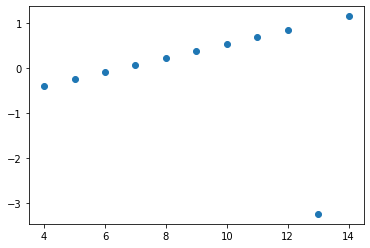

In [153]:
# plt.scatter(d3['y'], model.resid)

#print(yfit)
res = yfit1 - d3["y"] #residuals are the difference between the line of best fit and y-vals
#print(resid)
plt.scatter(d3["x"], res)

(array([1., 0., 0., 0., 0., 0., 2., 3., 3., 2.]),
 array([-3.24109091, -2.80111818, -2.36114545, -1.92117273, -1.4812    ,
        -1.04122727, -0.60125455, -0.16128182,  0.27869091,  0.71866364,
         1.15863636]),
 <BarContainer object of 10 artists>)

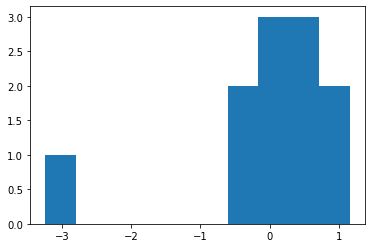

In [154]:
plt.hist(res)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

- There is a linear relationship, seen from the scatter plot
- There is homoskedasticity of errors
- There is not independence of errors
- The residuals of the model are normally distributed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

I will adjust the model by removing the outlier point (13.0, 12.74)

In [155]:
#dropping the row for the outlier
d3 = d3.drop(labels=24, axis=0)
print(d3)

   dataset     x     y
22     III  10.0  7.46
23     III   8.0  6.77
25     III   9.0  7.11
26     III  11.0  7.81
27     III  14.0  8.84
28     III   6.0  6.08
29     III   4.0  5.39
30     III  12.0  8.15
31     III   7.0  6.42
32     III   5.0  5.73


The summary is this,                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           6.17e-22
Time:                        16:04:08   Log-Likelihood:                 44.749
No. Observations:                  10   AIC:                            -85.50
Df Residuals:                       8   BIC:                            -84.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0056      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


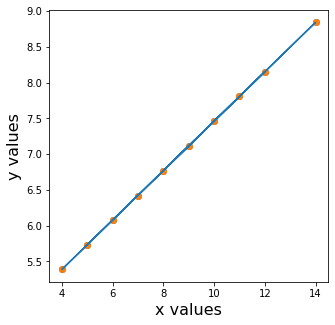

In [156]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.scatter(d3["x"], d3["y"])
axes.set_xlabel("x values", fontsize=16)
axes.set_ylabel("y values", fontsize=16)

model = sm.OLS(d3["y"],  sm.add_constant(d3["x"])).fit()
print("The summary is this, ", model.summary())

c, d = best_fit(d3["x"], d3["y"])

# plot points and fit line
plt.scatter(d3["x"], d3["y"])
yfit1 = [c + d * xi for xi in d3["x"]]
plt.plot(d3["x"], yfit1)

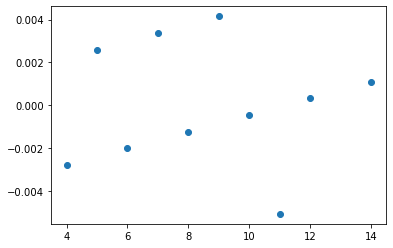

In [157]:
res = yfit1 - d3["y"] #residuals are the difference between the line of best fit and y-vals
#print(resid)
plt.scatter(d3["x"], res)


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The outlier was skewing the line of best fit too much so I removed the point. We can see after we remove the point the line of best fit is a much better predictor than before.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

The summary is this,                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sat, 24 Apr 2021   Prob (F-statistic):            0.00216
Time:                        16:04:09   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.1

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


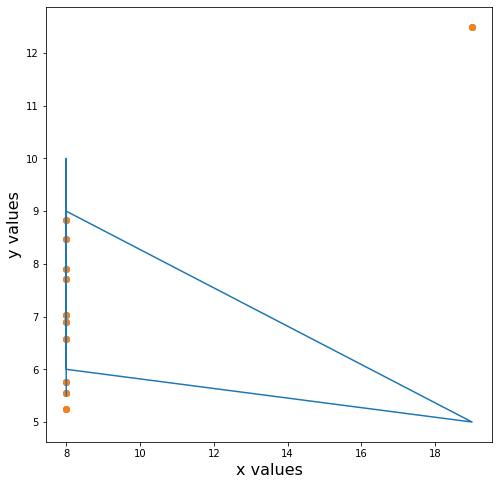

In [158]:
#copying over dataset 4
d4 = df.iloc[33:]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(d4["x"], d4["y"])
axes.set_xlabel("x values", fontsize=16)
axes.set_ylabel("y values", fontsize=16)

model = sm.OLS(d4["y"], sm.add_constant(d4["x"])).fit()
print("The summary is this, ", model.summary())


c, d = best_fit(d4["x"], d4["y"])

# plot points and fit line
plt.scatter(d4["x"], d4["y"])
yfit1 = [c + d * xi for xi in d2["x"]]
plt.plot(d4["x"], yfit1)


**The final model is:**
<br>
$y$ = $3.0$ + $0.5x$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

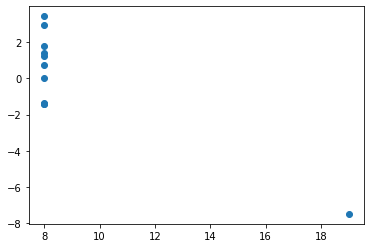

In [159]:
res = yfit1 - d4["y"] #residuals are the difference between the line of best fit and y-vals
#print(resid)
plt.scatter(d4["x"], res)



(array([1., 0., 0., 0., 0., 3., 1., 2., 2., 2.]),
 array([-7.49863636, -6.40470909, -5.31078182, -4.21685455, -3.12292727,
        -2.029     , -0.93507273,  0.15885455,  1.25278182,  2.34670909,
         3.44063636]),
 <BarContainer object of 10 artists>)

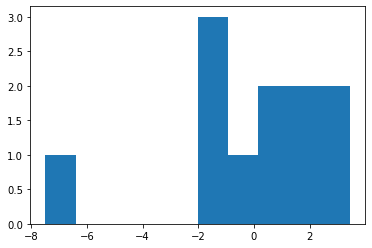

In [160]:
plt.hist(res)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

- There is not a linear relationship, seen from the scatter plot
- There is homoskedasticity of errors for the most part
- There is independence of errors
- The residuals of the model are normally distributed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

I wouldn't adjust this model in this case because it doesn't make sense to try to do a regression on a vertical set of points. The slope is zero.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

In this dataset one high leverage point (the point to the top right) is far enough to impact the model and make it seem from the table that there is a correlation coefficient.